<a href="https://colab.research.google.com/github/mattbobea/AI_in_Business_Application/blob/main/AI_8_Convolutional_Neural_Network_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **## Convolutional Neural Network (CNN) ## Hands on digit recognition**

In [ ]:
from google.colab import drive         # tell colab to look at google drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


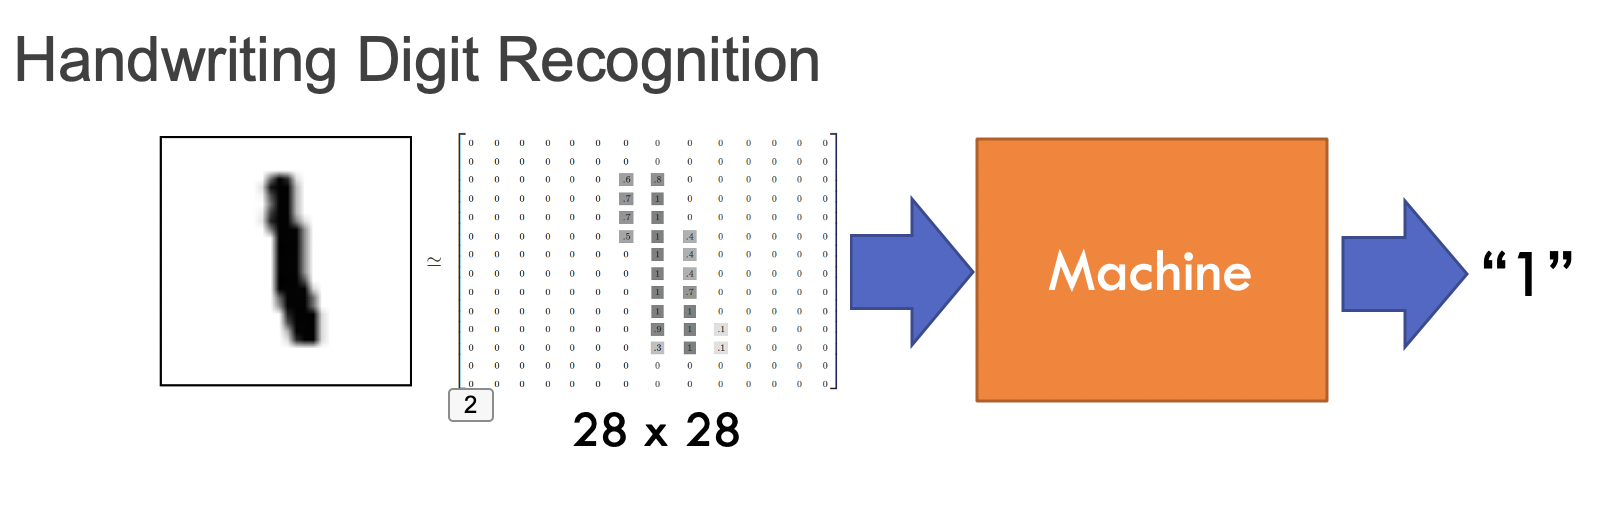

In [ ]:
# for teaching purpose
from IPython.display import Image
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('mnist_process.png')

# **Neural Network Pipeline**

### **Step 0: Preperation**
> **step 0-0: Enviroment Setting**

> **step 0-1: Import Package**

> **step 0-2: Import Dataset**

> **step 0-3: Take a look at data**

> **step 0-4: Data Preprocessing: standardize for input**

> **step 0-5: Data Preprocessing: one-hot encoding for output**


### **Step 1: Build a function (Neural Network)**

> **step 1-1: Import Package regarding NN**

> **step 1-2: What's our NN look like? Build it!**

### **Step 2: Goodness of function**

> **step 2-1: Compile**

> **step 2-2: Check our NN structure**

### **Step 3: Choose the best function**

> **step 3-1: Traing! Find the optimal network parameters**

> **step 3-2: Save & Load NN Model**

> **step 3-3: Testing**



# **Step 0: Preperation**

# **step 0-1: Enviroment Setting**

1. version of tensorflow
2. runtime: GPU / TPU

In [ ]:
# Make sure we are using 2.x instead of 1.x
%tensorflow_version 2.x

# !pip install --upgrade keras # it's because we use tf2.0

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


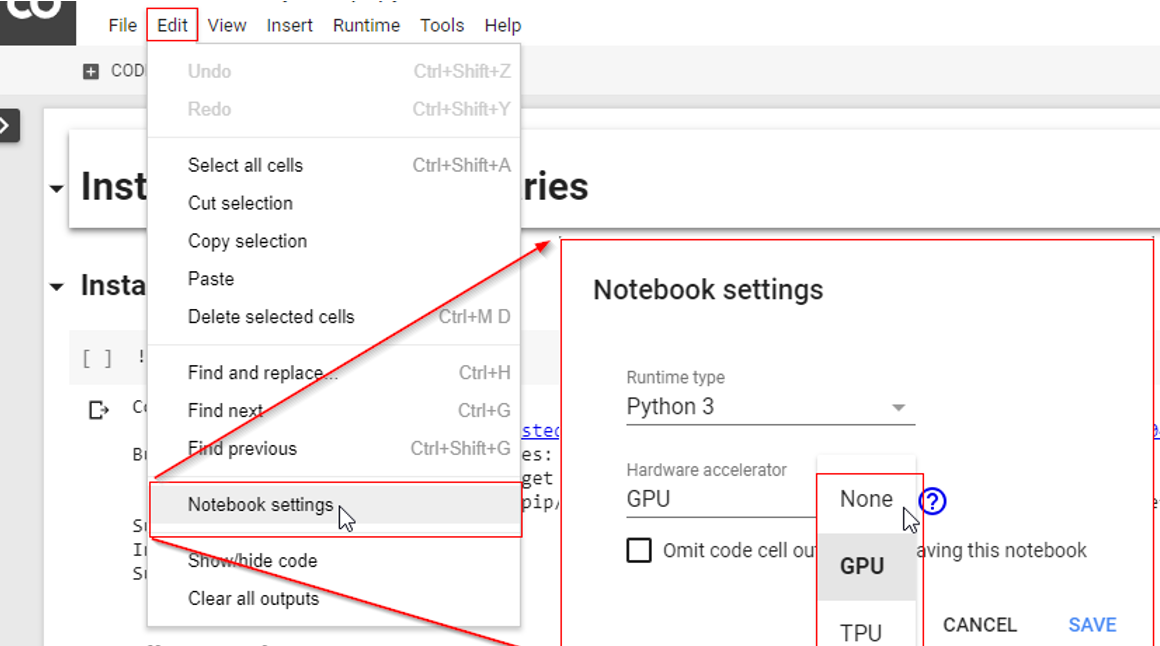

In [ ]:
from IPython.display import Image
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('Colab_gpu_notebook.png')

# **step 0-1: Import Package**

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **step 0-2: Import Dataset**

In [ ]:
# from keras.datasets import mnist # FNN_digit.ipynb use this , both are fine
from tensorflow.keras.datasets import mnist
# ref: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/ # 1.1 What Are Keras and tf.keras?

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **step 0-3: Take a look at data**

In [ ]:
x_train.shape

(60000, 28, 28)

/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


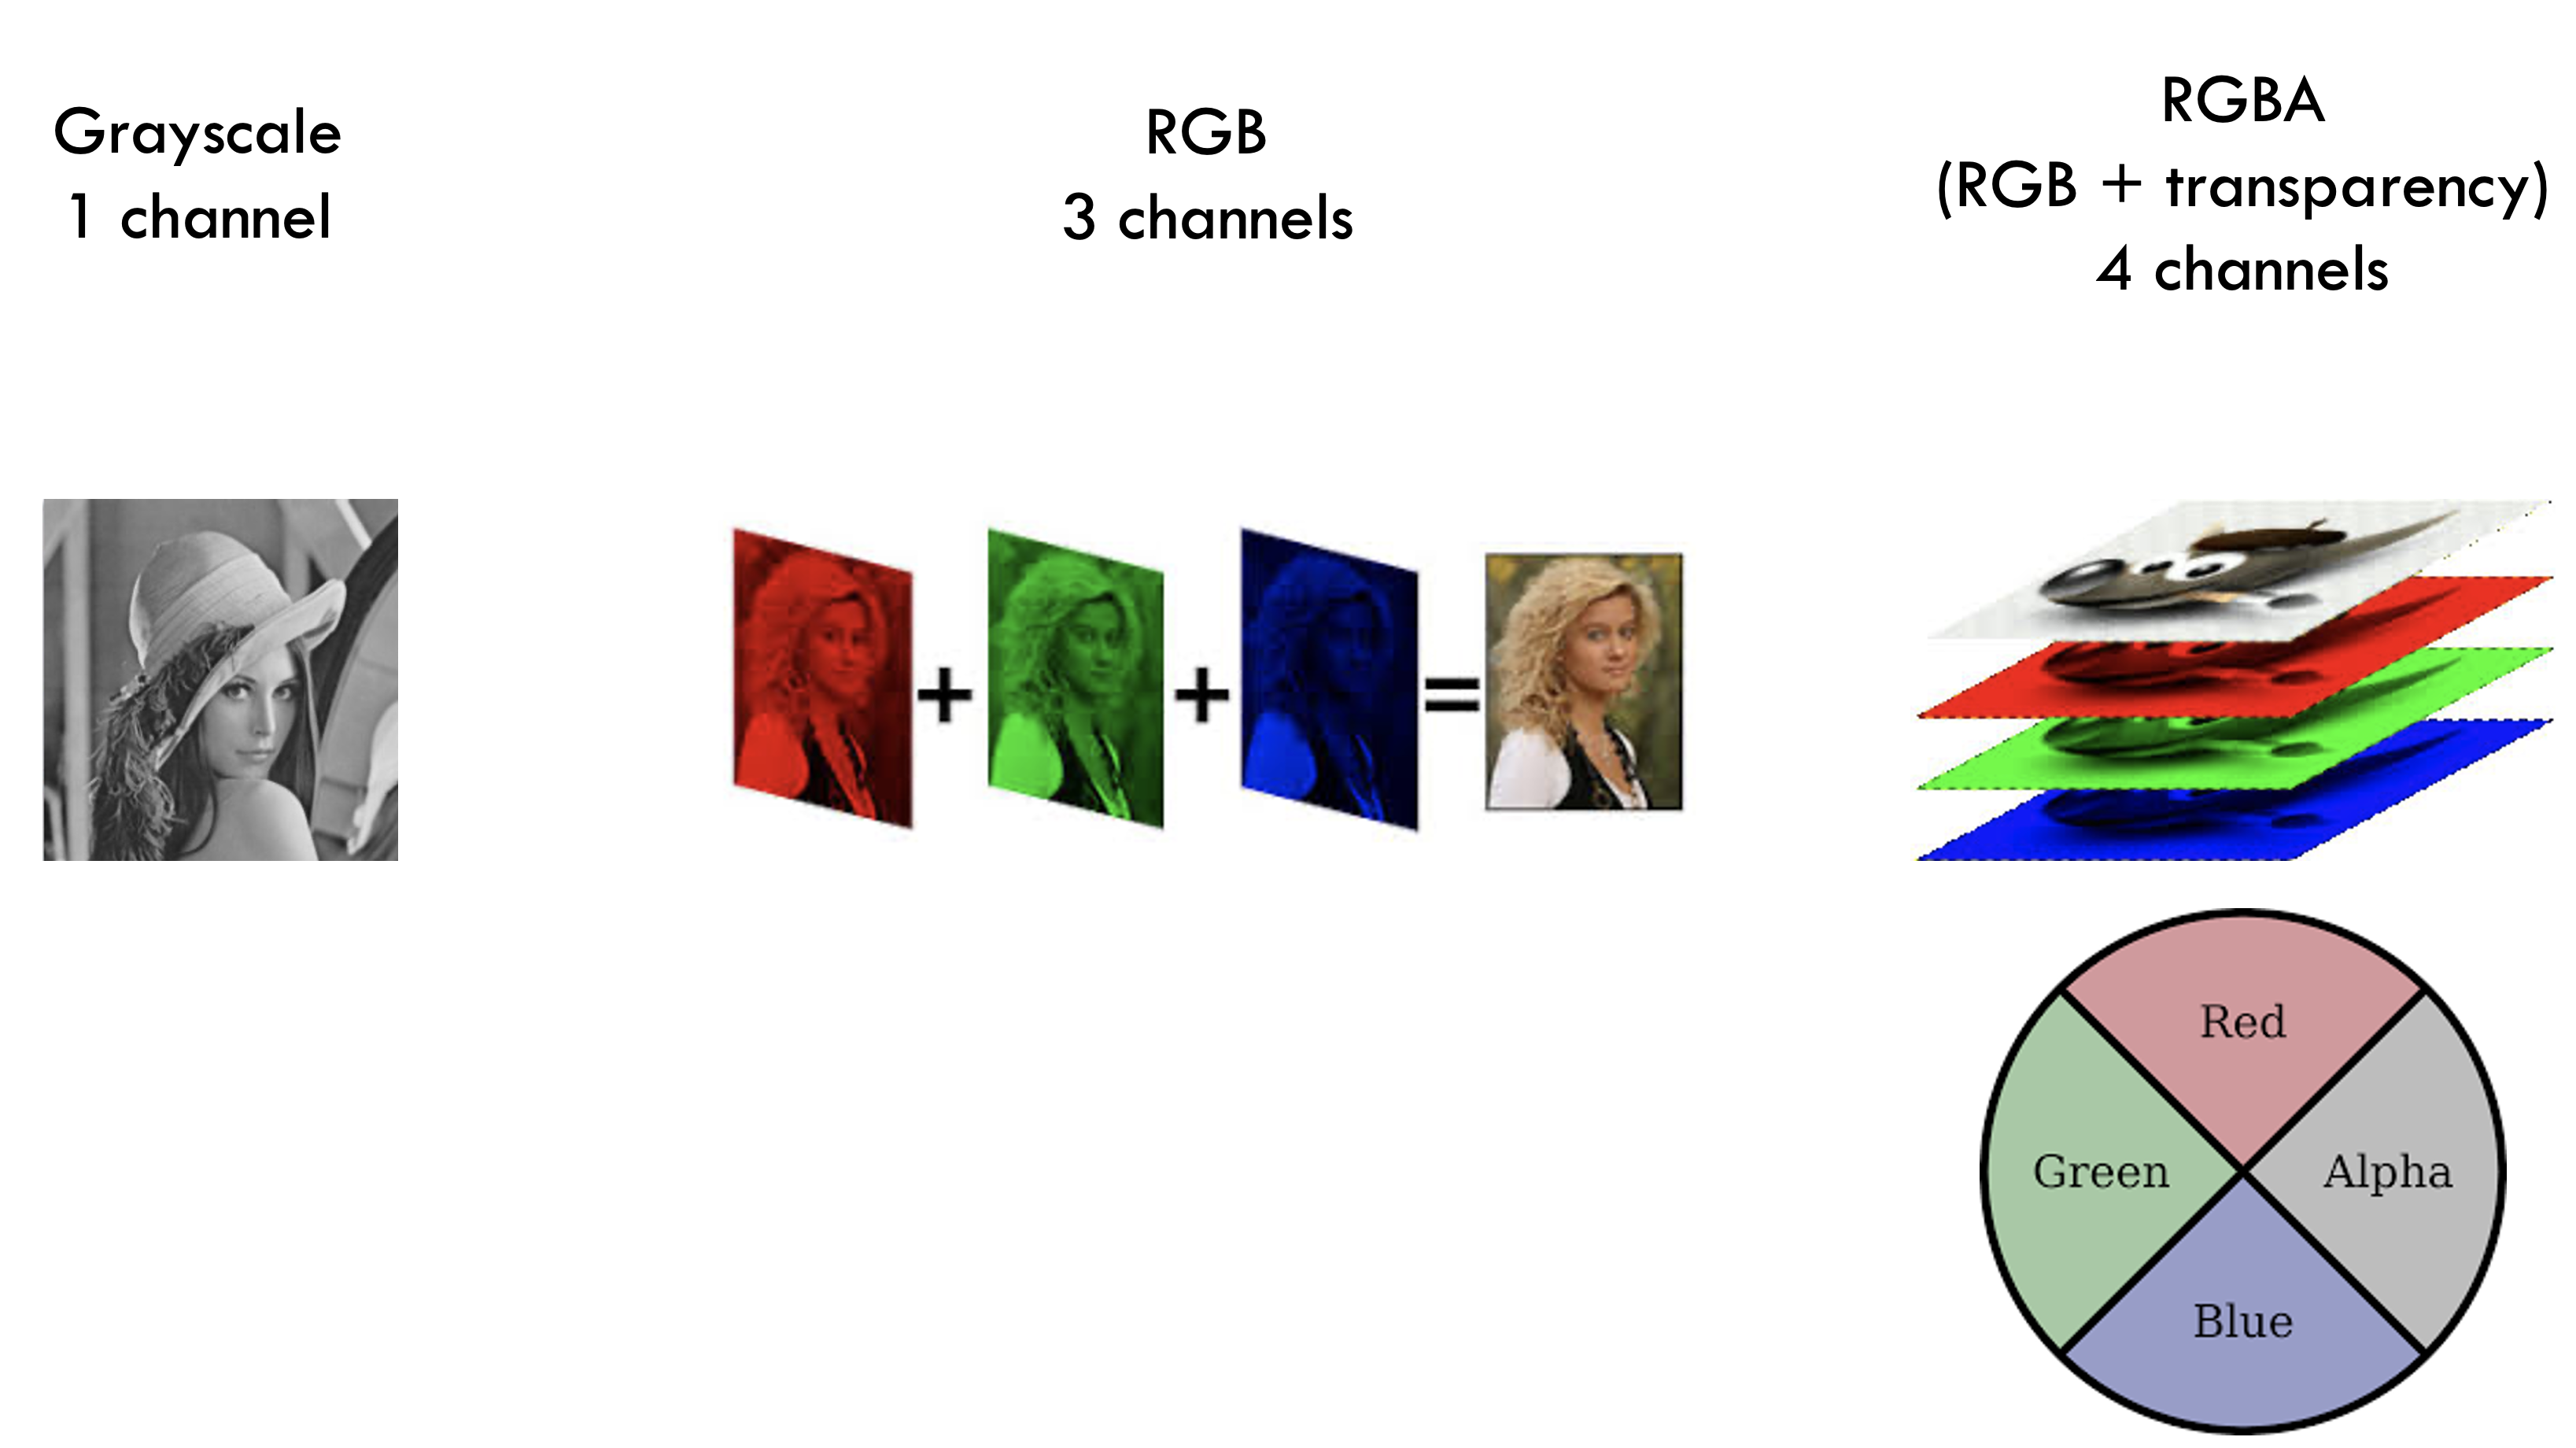

In [ ]:
from IPython.display import Image
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('Channel1&3&4.png')

### **Channel(s)**

For a CNN problem, pay attention to how many channels your image have.

##### * **Graysacle image: 1 channel**
##### * **Color image (RGB  = Red Green Blue):              3 channels**
##### * **Color image (RGBA = Red Green Blue Transparency): 4 channels**


Our image are grayscale, so we have to rescale it. (28,28) --> (28, 28, 1)

The third dimension means it has 1 channel.

# **step 0-4: Data Preprocessing: standardize for input**

### **Also called normalization**

Here we have change it to [0,1], but sometimes we need to have mean 0 var 1. Since here is only intensity of each color.

/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


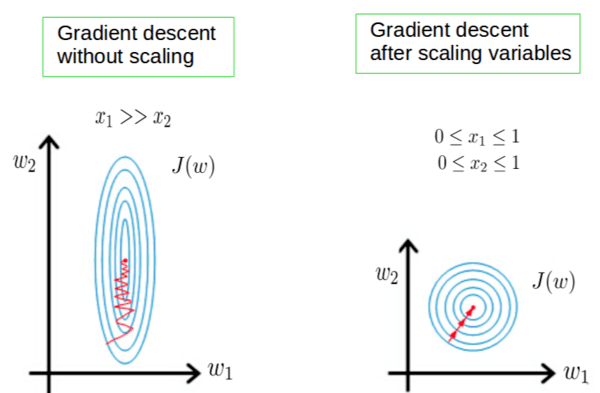

In [ ]:
from IPython.display import Image
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('Feature_Scaling1.png')

In [ ]:
# reshape to add another dimension to "channels". From (28,28) to (28,28,1). Channels means different color. Here is grayscale, so channel is 1. 
x_train = x_train.reshape(60000, 28, 28, 1) / 255
# the good thing about reshape is: it doesn't change the shape immediately, so we have to say x_train = ....

In [ ]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train[666].shape

(28, 28, 1)

In [ ]:
y_train[666]

0

# **step 0-5: Data Preprocessing: one-hot encoding for output**

/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


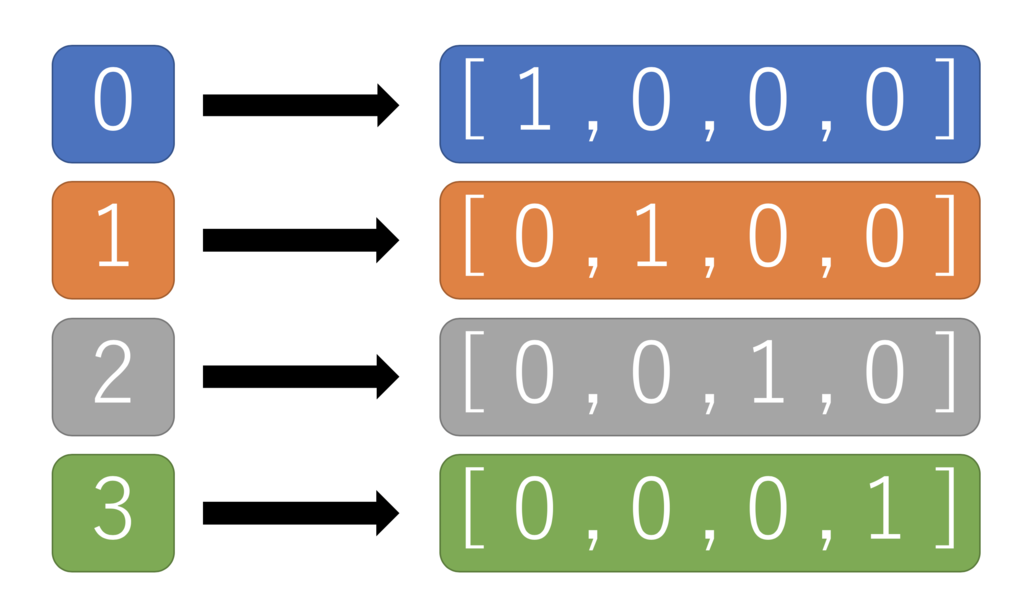

In [ ]:
from IPython.display import Image
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('onehot_num_4dim.png')

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# compare y_train before "to_categorical" and after "to_categorical"
y_train[666]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **Step 1: Build a function (Neural Network)**


# **step 1-1: Import Package regarding CNN**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D # the only thing new in CNN
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
# open a new space for the model
# Sequential: the classical neural network structure that pass information from one layer to next layer, a sequence of layer
# Name our model as "model", you can name anything you want, just like a variable name, I'll name modelCNN
mymodelCNN = Sequential()

# **Question:** 
### **How many neurons do we want to build?**
### **For CNN, it means what's the filter(s) look like?**

In [ ]:
# Input: ( 28, 28, 1 )
# Function:
# Output: 10-dim

# Filter size: (3x3) usually choose odd number
# First hidden layer: output 8  28x28 matrix
# so the output grid size is (28, 28, 16)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
8*3*3+8
# weights 8*3*3
# bias +8 
# (3*3+1)*8

80

In [ ]:
# output: ( 28 , 28 , 8 )

In [ ]:
# then we want to have maxpooling
# size of maxpooling: 2x2

In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# (14,14,8)

# **Quesion: Filter number increase or decrease?**

### **Usually double**

##### **so here 8>>16**

In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
Total params: 1,248
Trainable params: 1,248
Non-trainable params: 0
_________________________________________________________________


In [ ]:
((8*3*3)+1)*16

# (3*3*16+1)*32

1168

In [ ]:
# output (14, 14, 32)

In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
Total params: 1,248
Trainable params: 1,248
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# output (7, 7, 32)

In [ ]:
# output (7, 7, 64)

In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
Total params: 5,888
Trainable params: 5,888
Non-trainabl

In [ ]:
# 32*(64*3*3)+64
(16*3*3+1)*32

4640

In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [ ]:
# output ( 3 , 3 , 64 )

In [ ]:
# since fully connected network needs to have flatten input, so we need to flatten before connect to fnn


In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [ ]:
# how many neurons do you want (here we just want to have a smaller one), no reason for 54


In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [ ]:
288*64+64

# weight + bias

18496

In [ ]:
# connect to output layer


In [ ]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

# **Step 2: Goodness of function**

In [ ]:
modelCNN.compile(loss='mse', optimizer=SGD(lr=0.087),
             metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# **Step 3: Choose the best function**
# **step 3-1: Traing! Find the optimal network parameters**

/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img


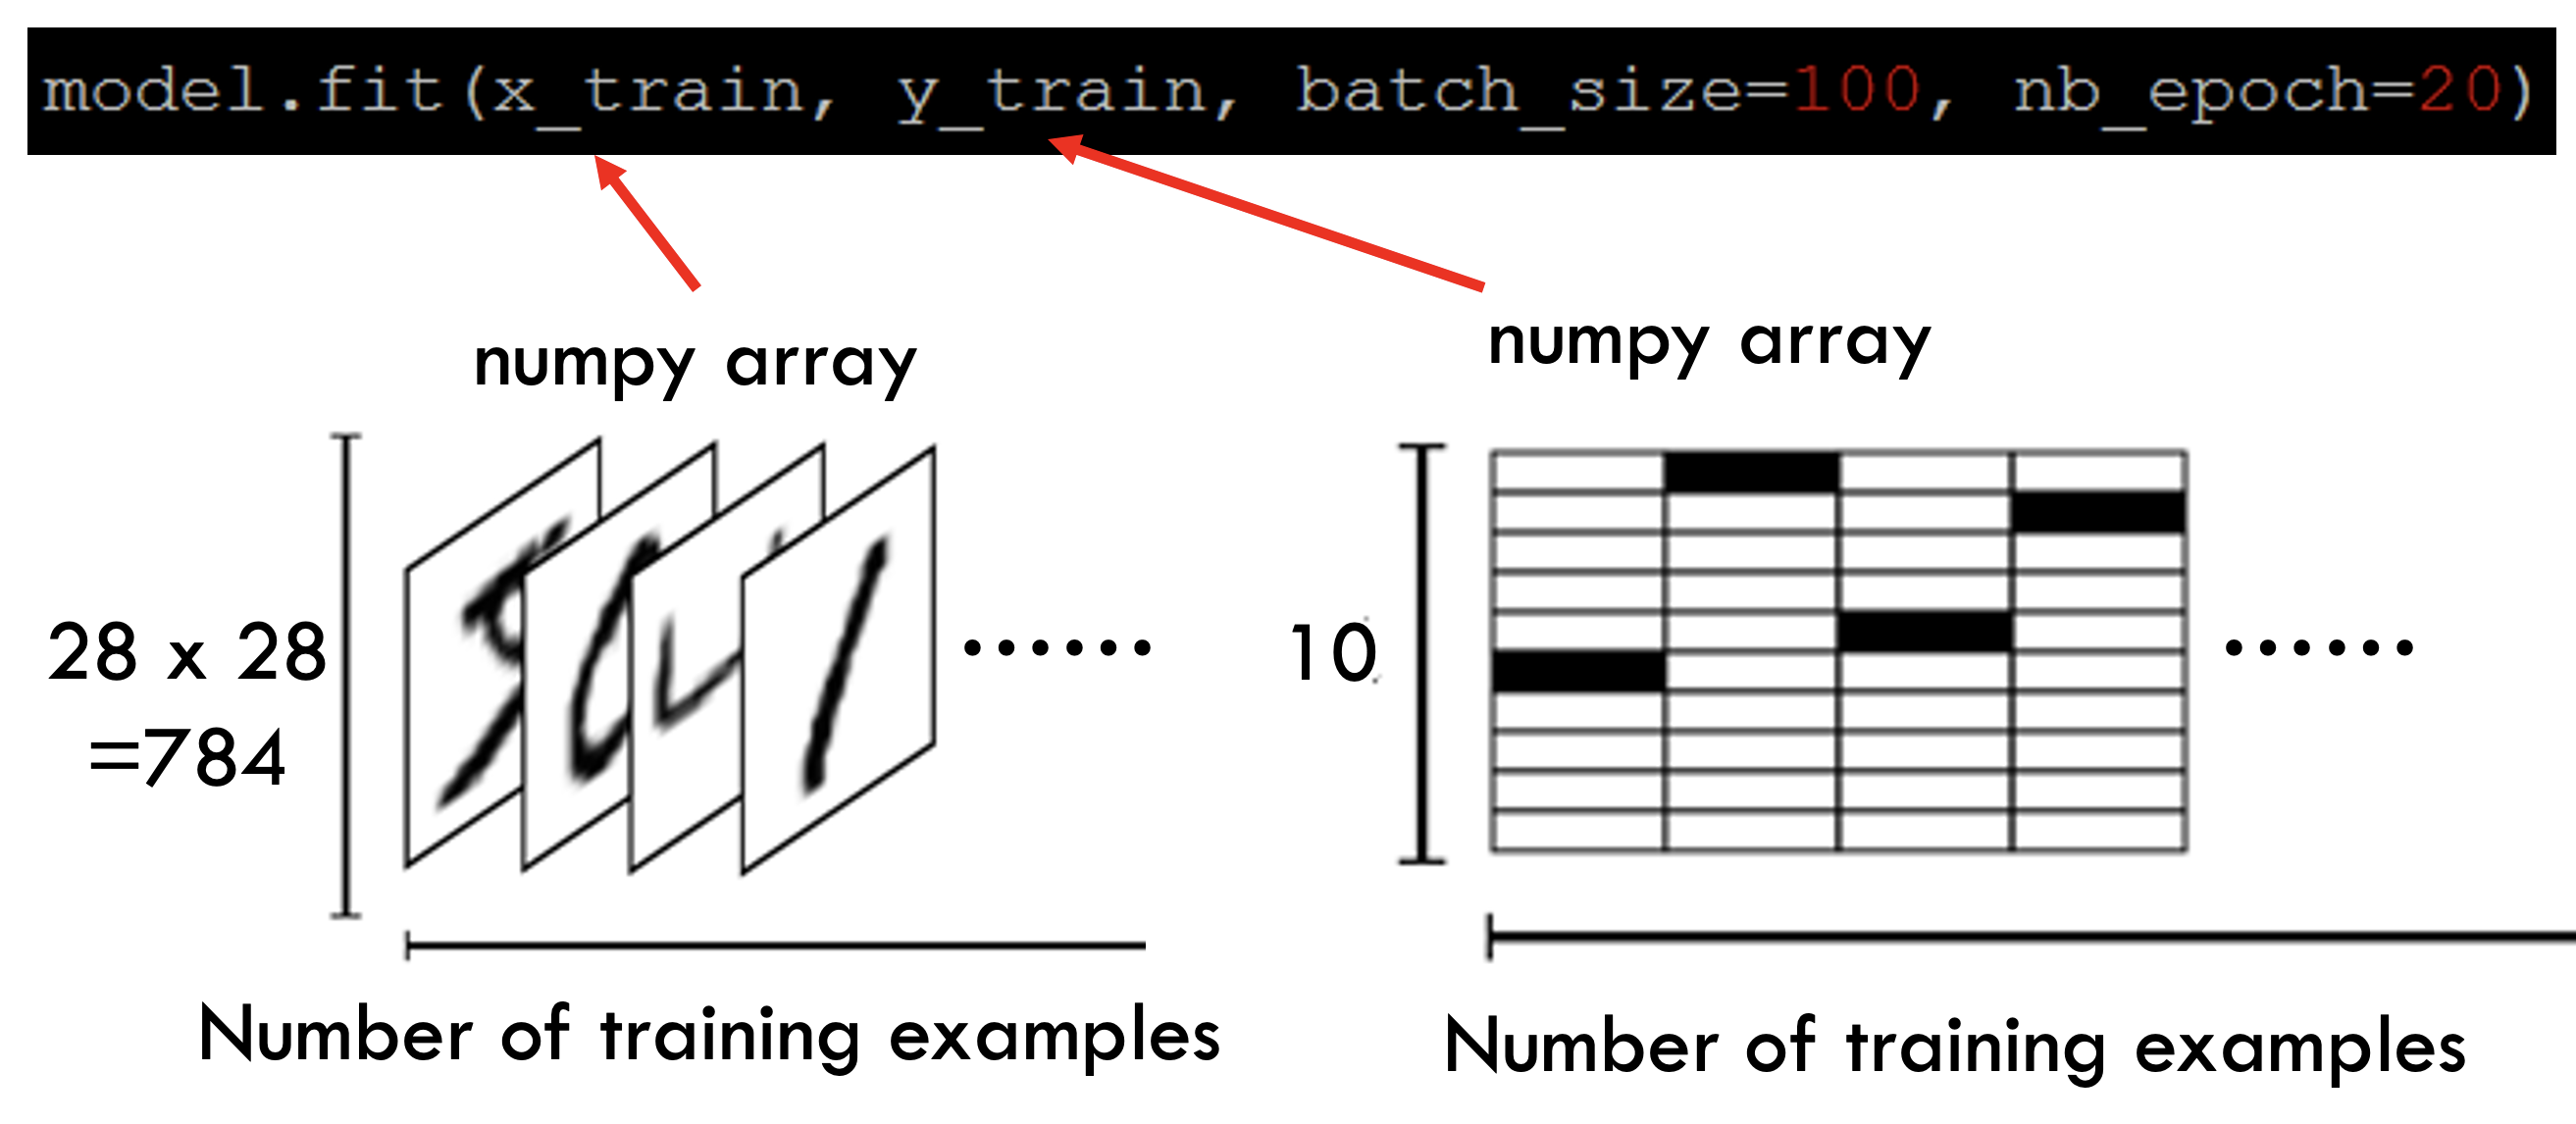

In [ ]:
from IPython.display import Image
%cd "/content/drive/My Drive/2021_AI_Biz_Demo/AI_Biz_Demo_Img"
Image('NN_model_fit.png')

In [ ]:
# take times
modelCNN.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
469/469 [==============================] - 13s 8ms/step - loss: 0.0897 - accuracy: 0.1916
Epoch 2/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0881 - accuracy: 0.4080
Epoch 3/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0754 - accuracy: 0.5117
Epoch 4/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0343 - accuracy: 0.7795
Epoch 5/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0197 - accuracy: 0.8714
Epoch 6/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0147 - accuracy: 0.9044
Epoch 7/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0119 - accuracy: 0.9235
Epoch 8/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0100 - accuracy: 0.9361
Epoch 9/12
469/469 [==============================] - 4s 7ms/step - loss: 0.0089 - accuracy: 0.9437
Epoch 10/12
469/469 [==============================] - 4s 7ms/step - loss: 0.0079 - accuracy: 0.948

# **Prediction**

In [ ]:
predict = modelCNN.predict(x_test) # starting fall 2021
# result = modelCNN.predict_classes(x_test) # 2021 spring works
classes = np.argmax(predict,axis=1)

In [ ]:
def my_predict(n):
    print('my CNN prediction', classes[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

In [ ]:
from ipywidgets import interact_manual

In [ ]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>

In [ ]:
score = modelCNN.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0064 - accuracy: 0.9591


In [ ]:
loss, acc = score

In [ ]:
print('Accuracy from testing data', acc)

Accuracy from testing data 0.9591000080108643
